# Output data post-processing Water-Energy model

This notebook run the water-energy model and post-processing its results 

In [42]:
from pywr.model              import Model
from pywr.notebook           import draw_graph
from pywr.recorders          import TablesRecorder
from pywr.recorders.progress import ProgressRecorder
from matplotlib              import pyplot            as plt
import tables
import pandas
import seaborn
import numpy                                          as np
import os

import sys
sys.path.append('\\Users\\n65847jg\\Documents\\Doctorado\\Thesis\\Paper_1\\hydraville\\hydraville')
#sys.path.append('\\Users\\joseg\\Documents\\Postgraduate\\Doctorado\\Thesis\\Paper_1\\hydraville\\hydraville')
from moea                    import PyretoJSONPlatypusWrapper


%matplotlib inline

## Model Paths

In [43]:
JSON_PATH   = '../water-energyM'
DATA_PATH   = '../data'
OUTPUT_PATH = '../water-energyM/outputs'
FIG_PATH    = os.path.join(OUTPUT_PATH, 'figures')

## Water-Energy model

Here we run the water-energy model and plot some comparison of baseline results

In [44]:
model = Model.load(os.path.join(JSON_PATH,'water-energy.json'),)

draw_graph(model)

<IPython.core.display.Javascript object>

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


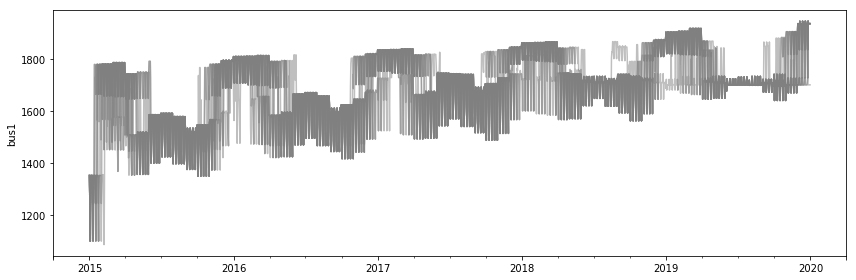

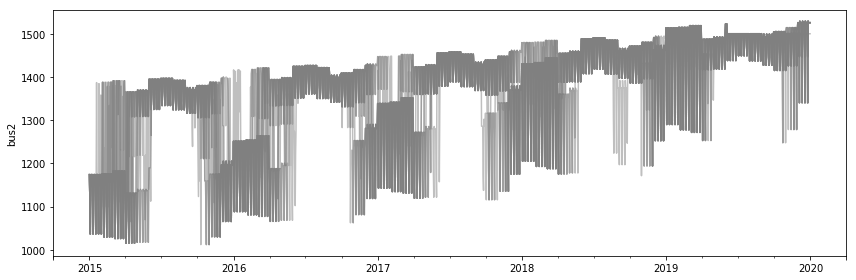

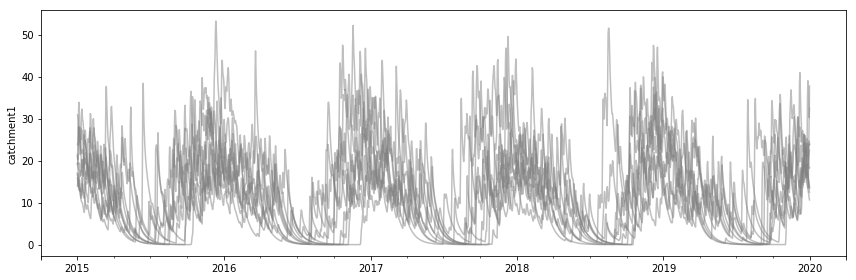

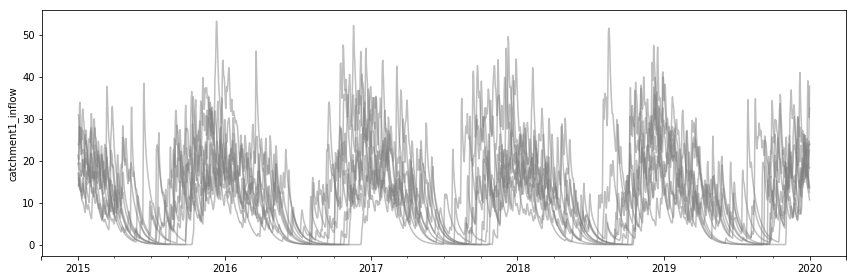

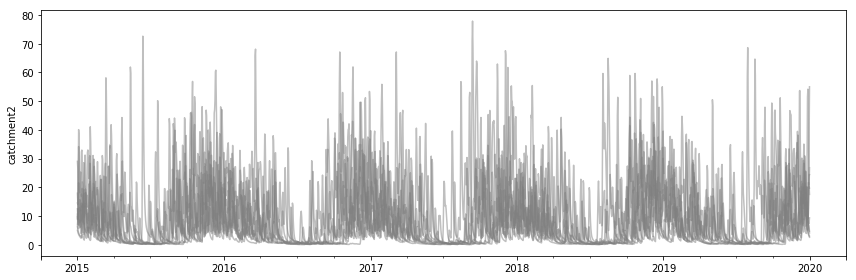

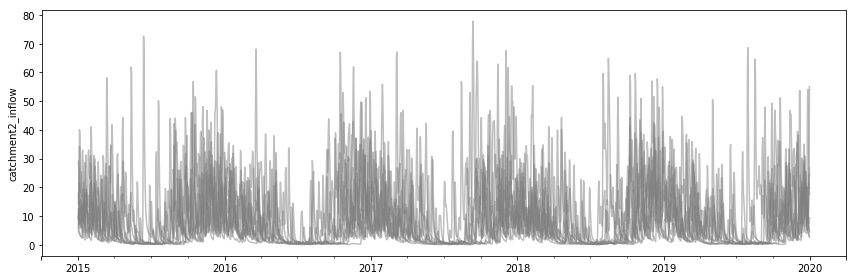

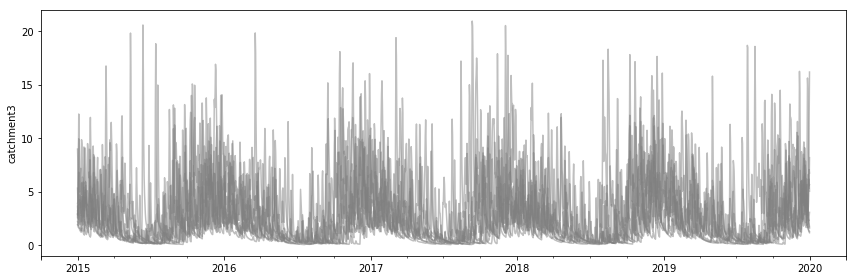

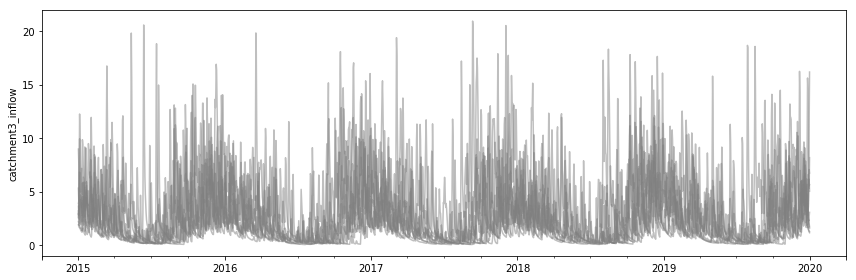

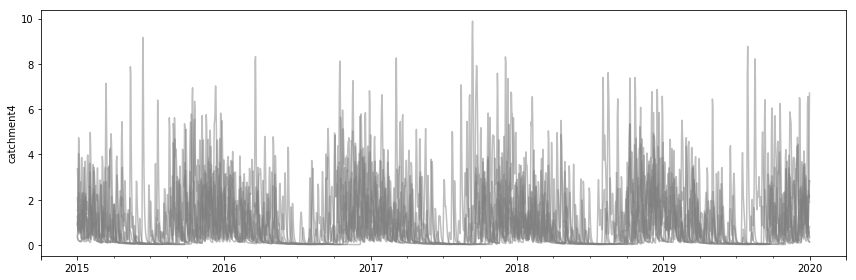

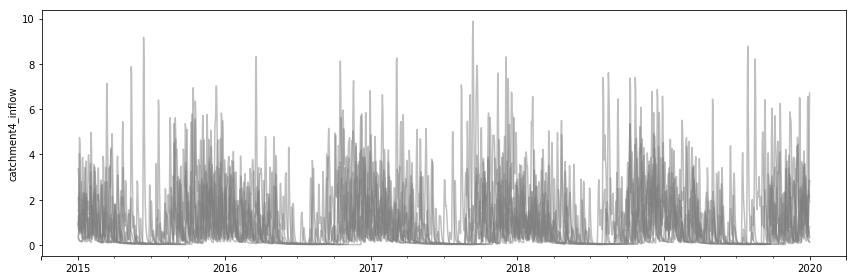

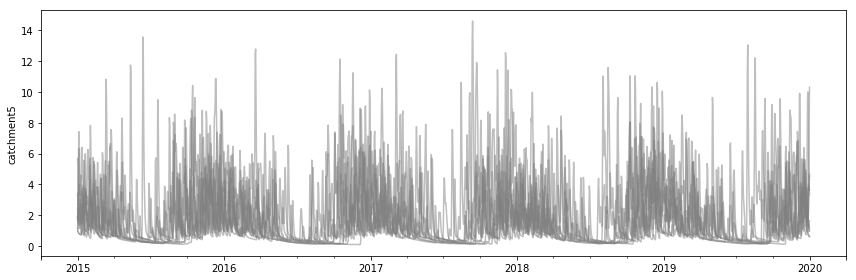

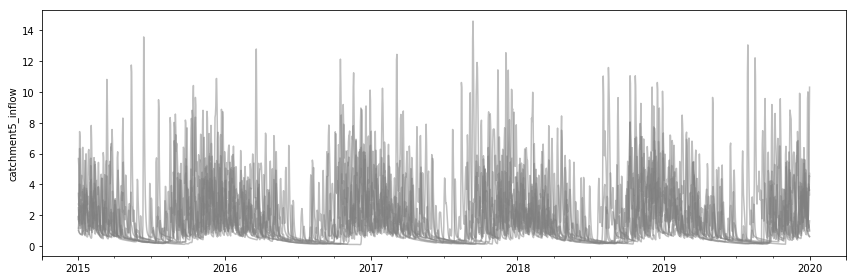

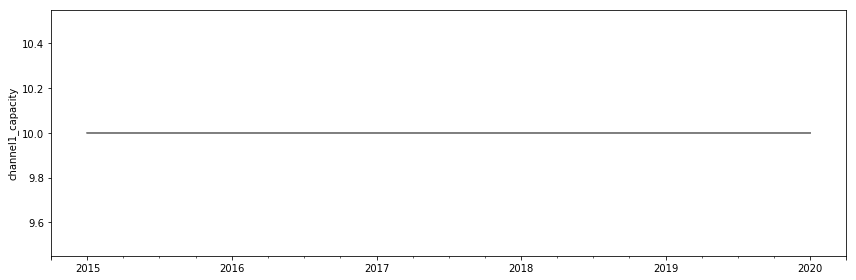

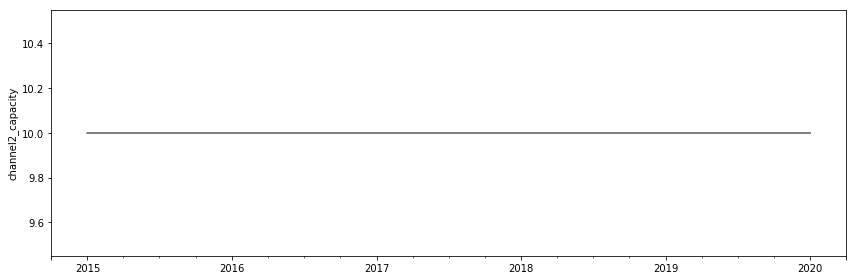

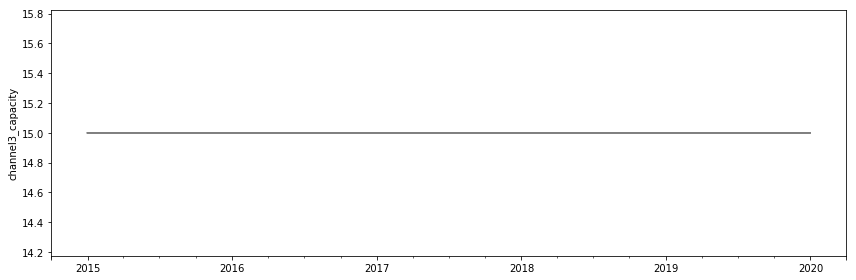

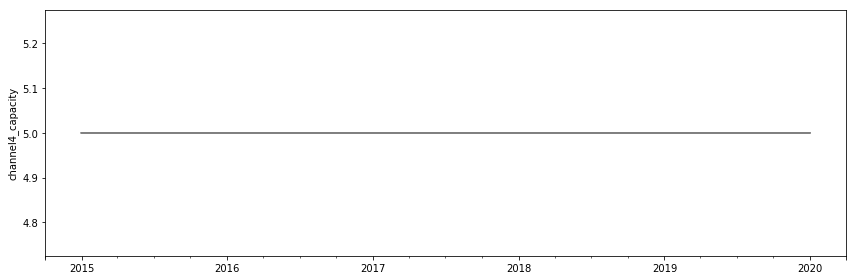

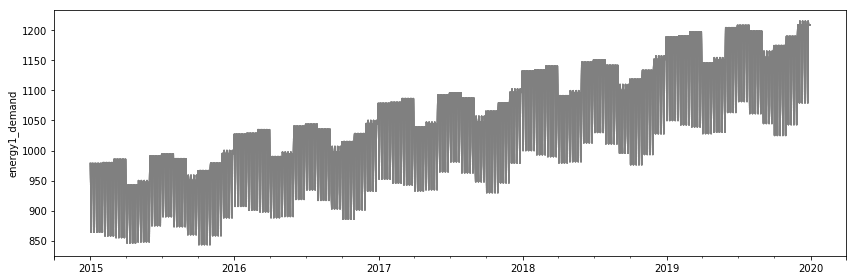

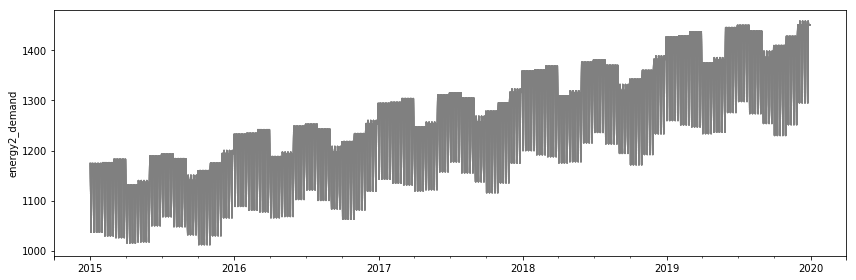

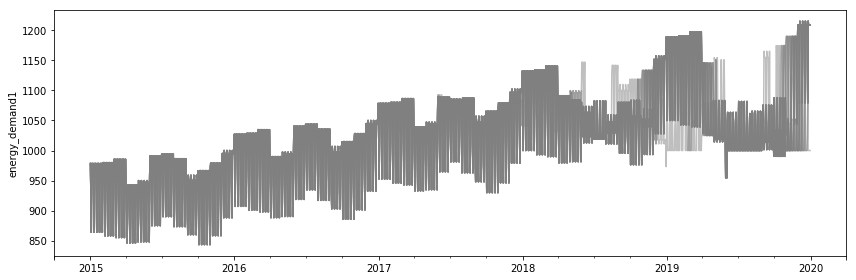

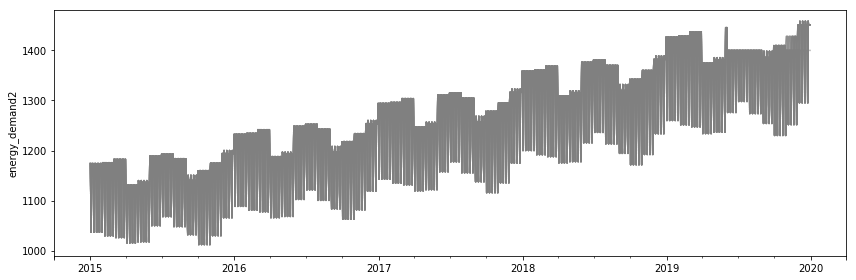

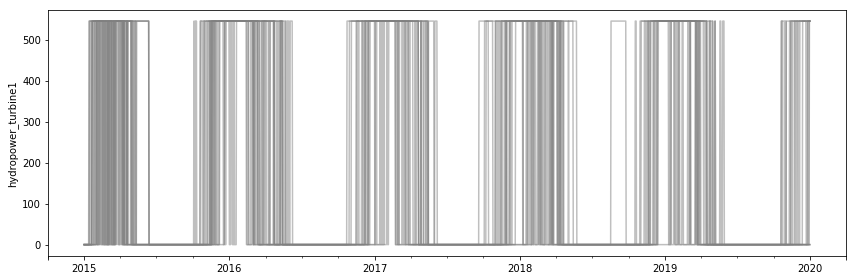

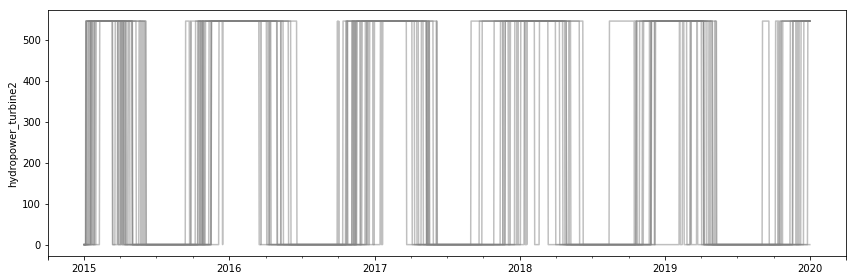

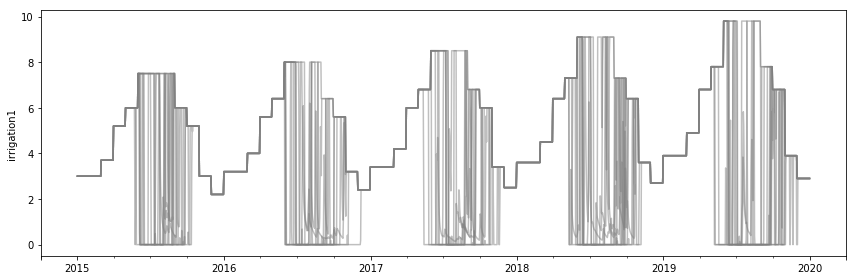

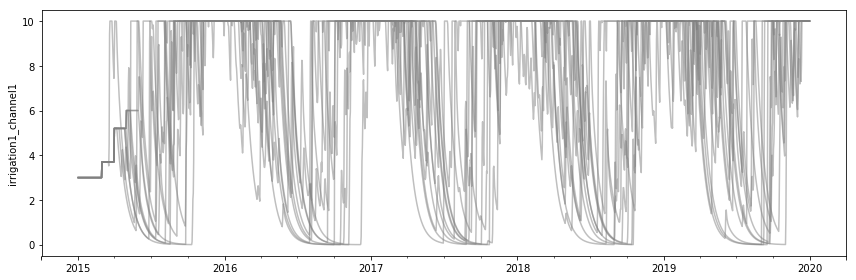

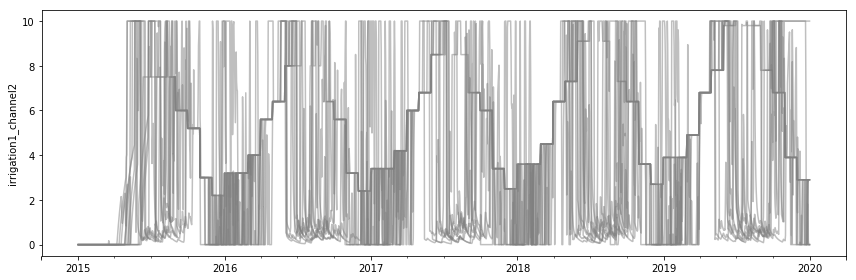

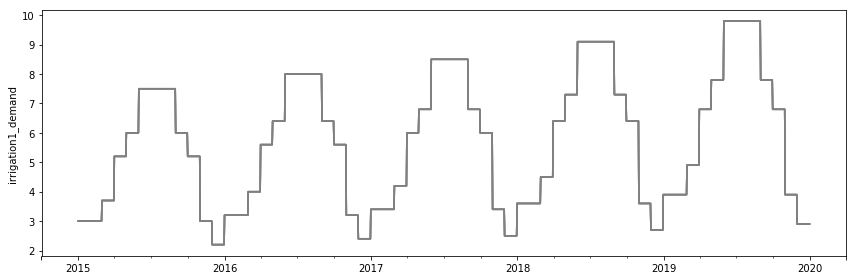

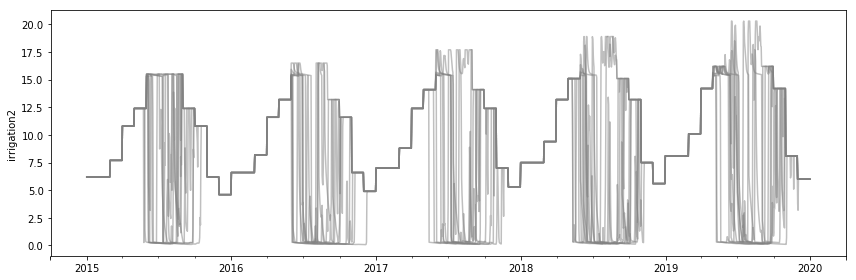

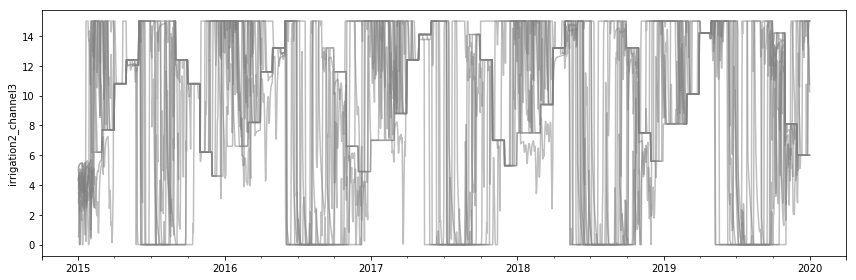

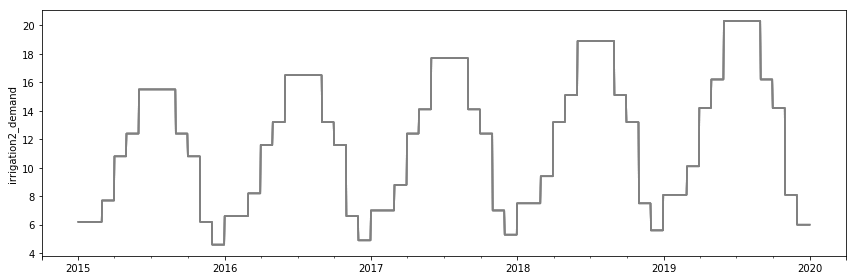

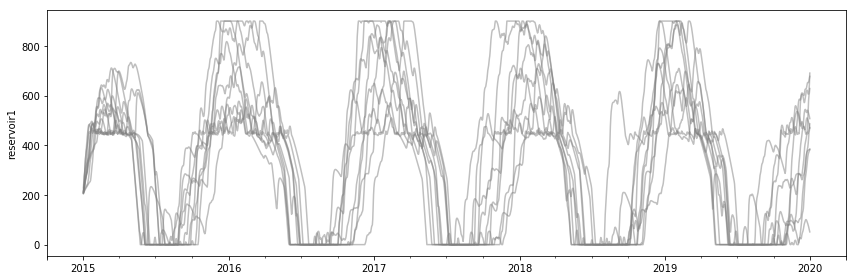

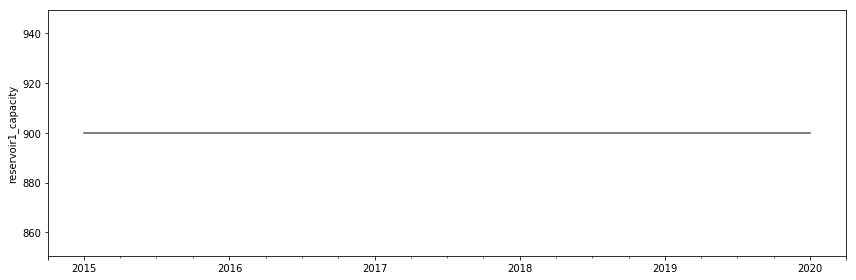

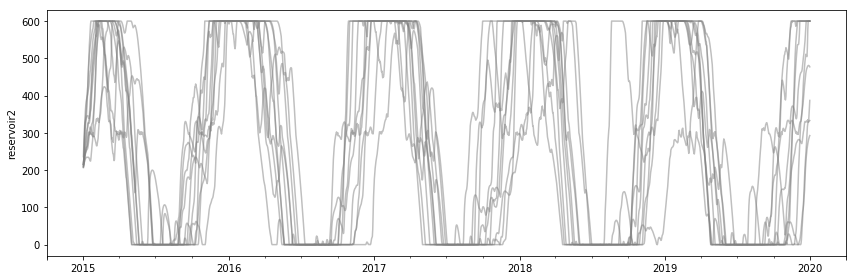

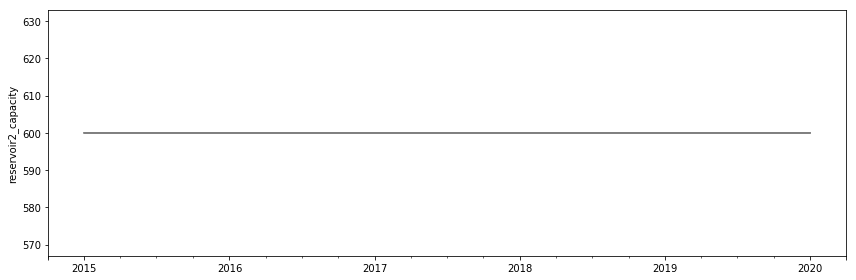

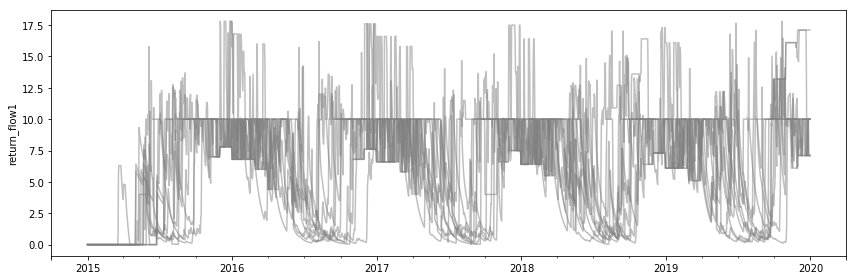

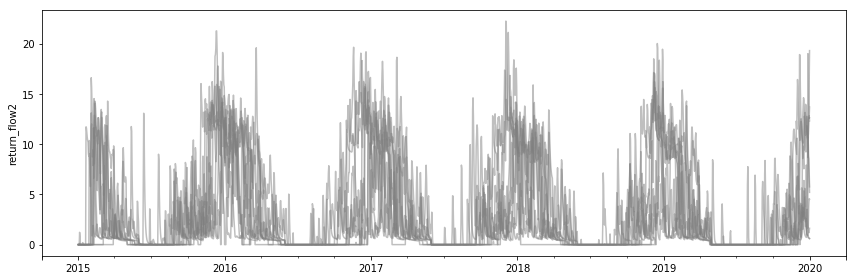

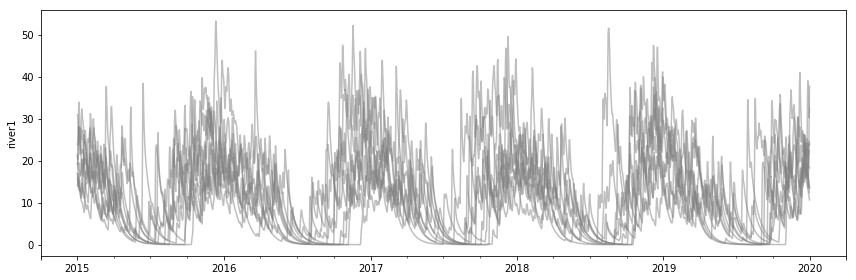

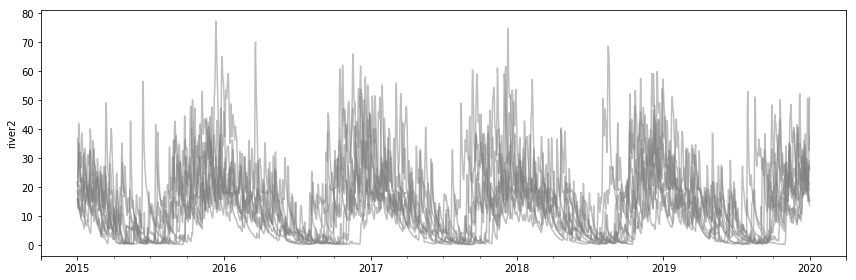

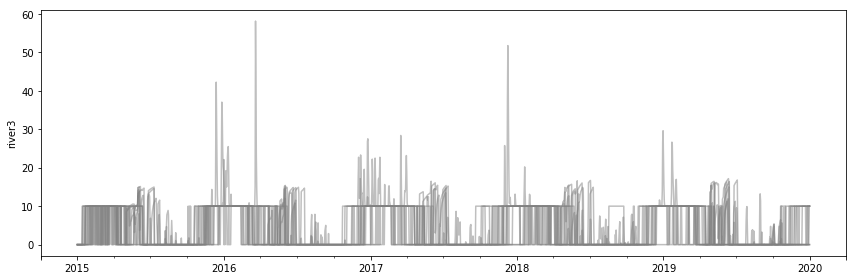

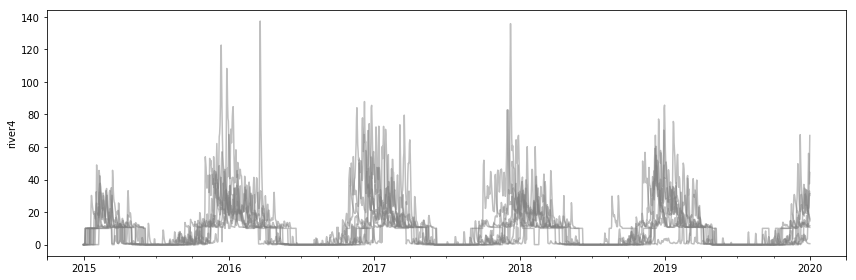

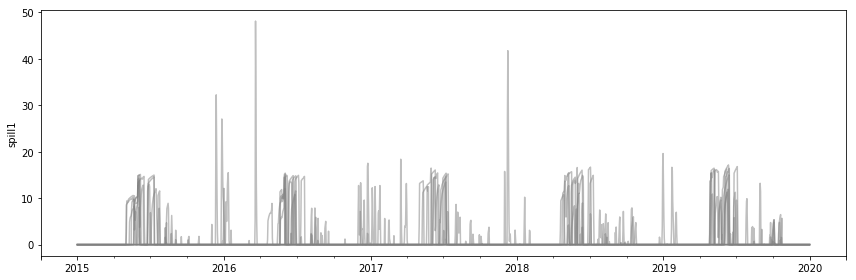

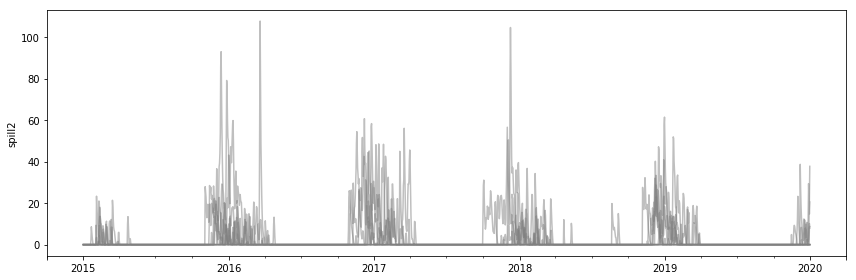

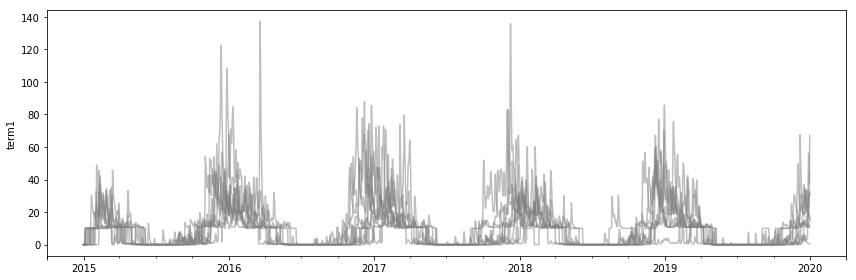

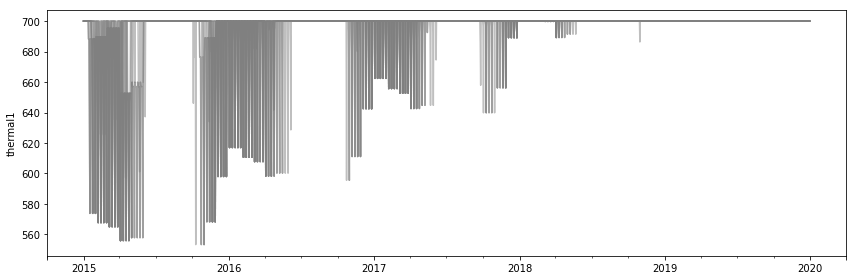

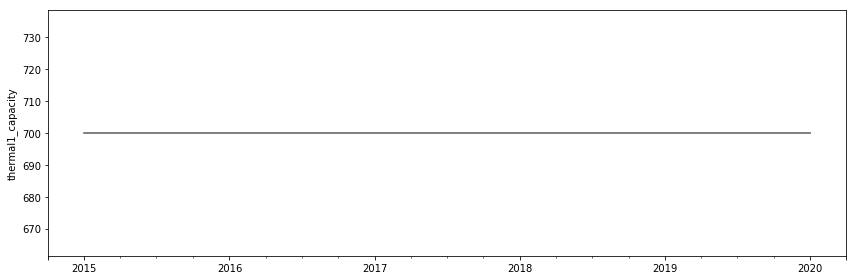

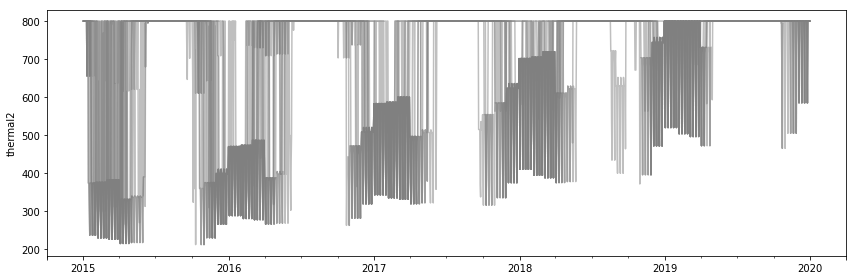

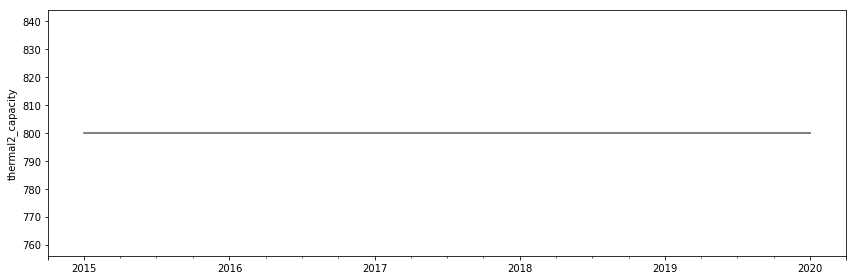

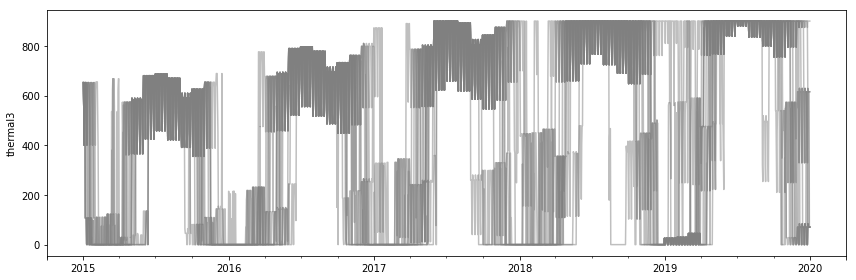

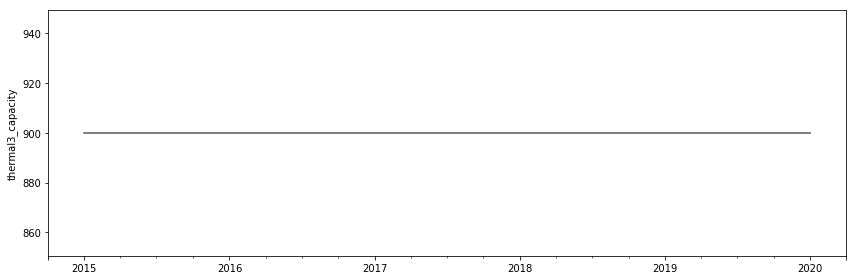

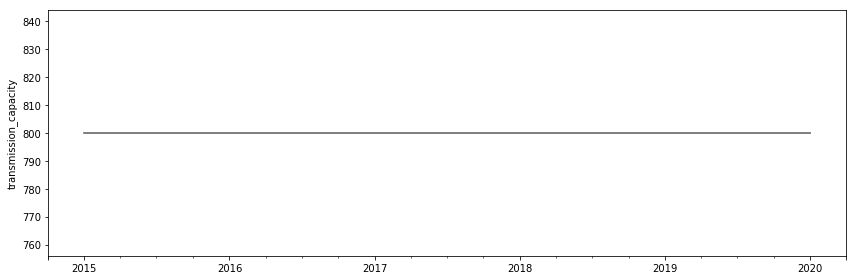

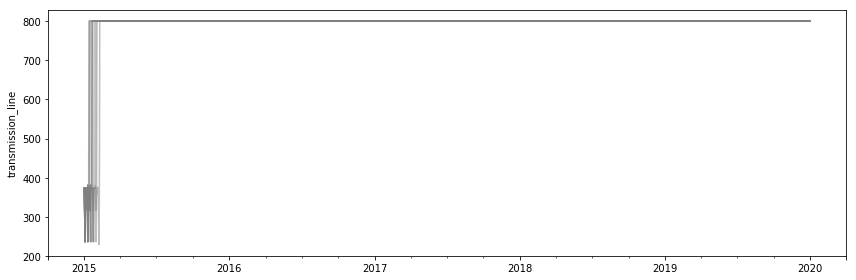

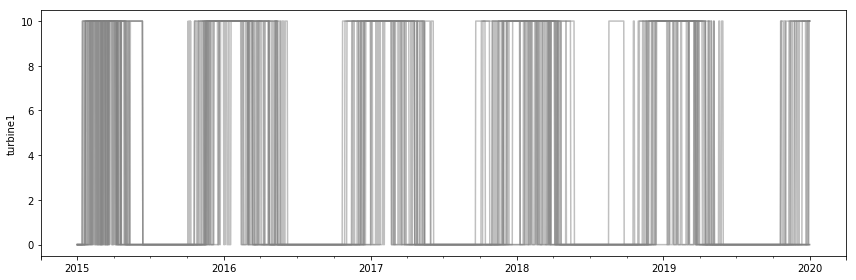

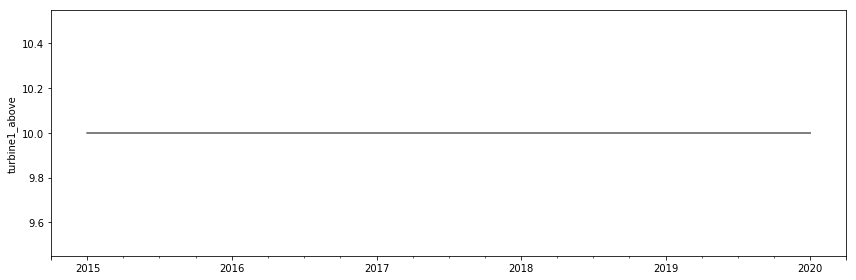

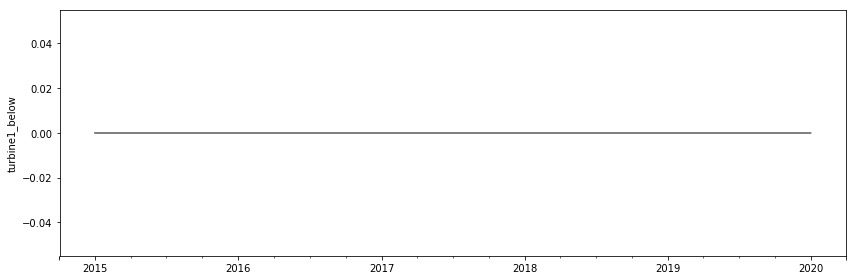

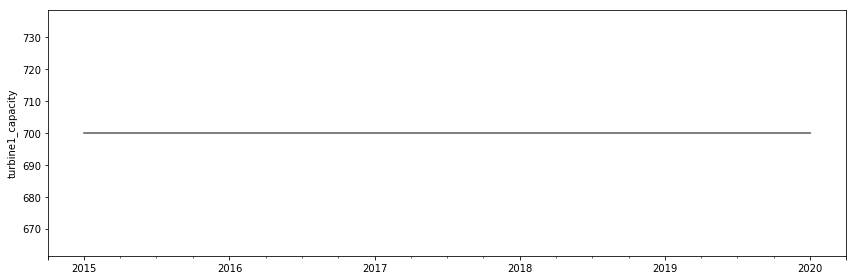

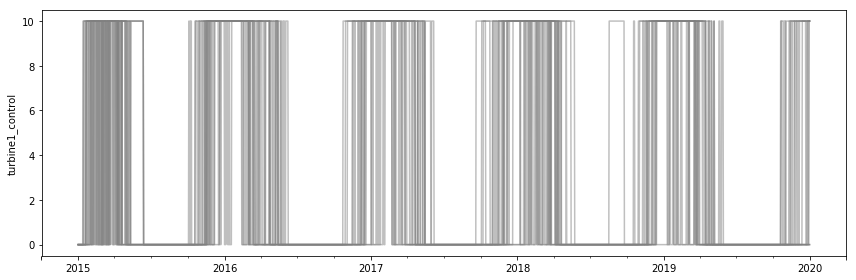

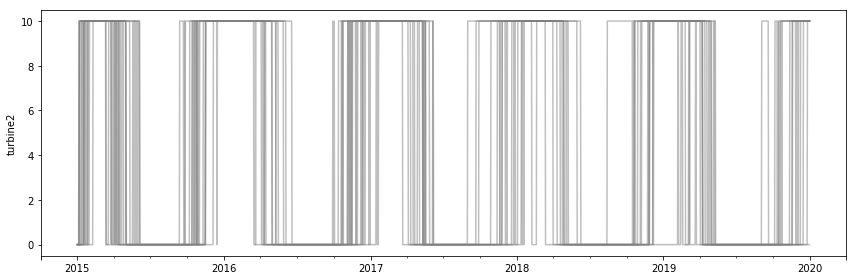

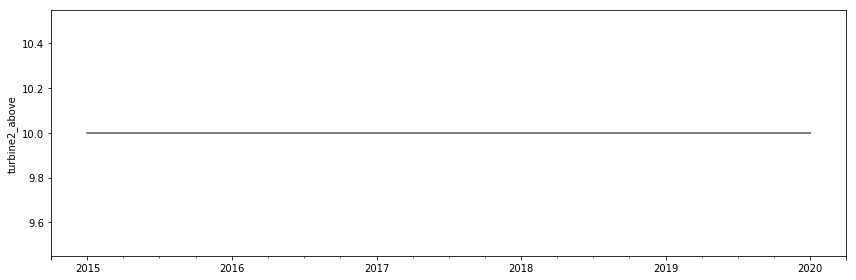

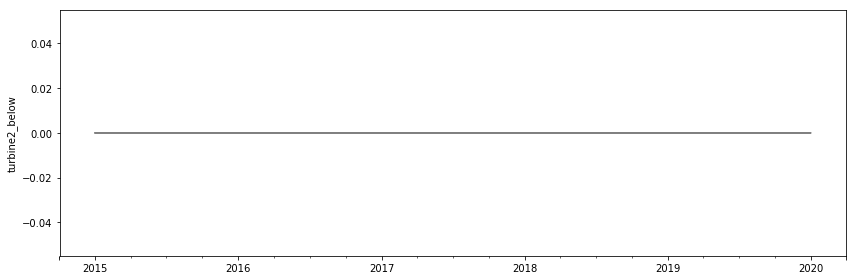

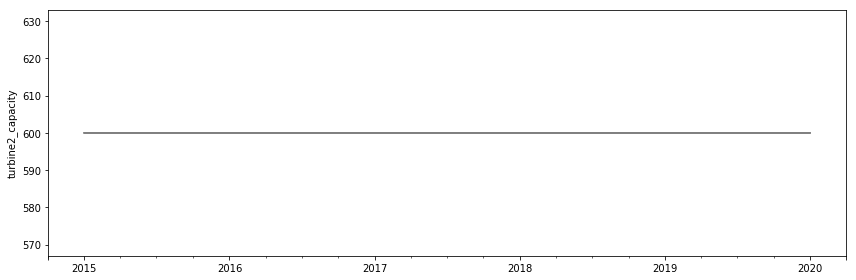

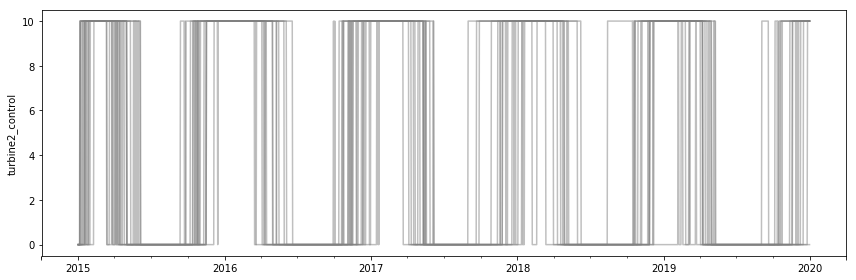

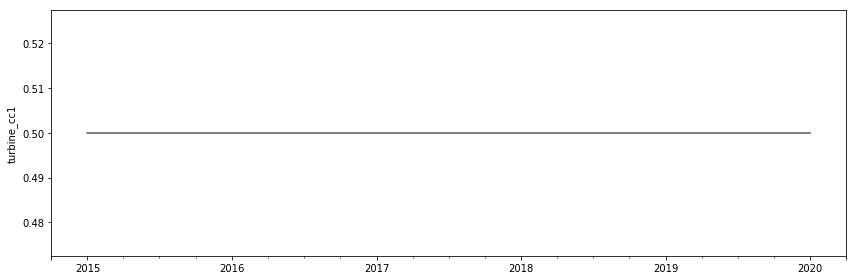

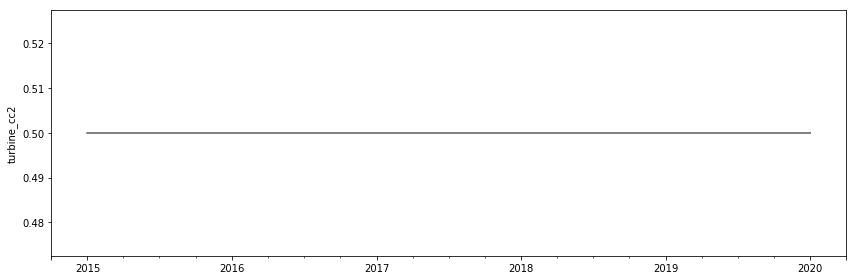

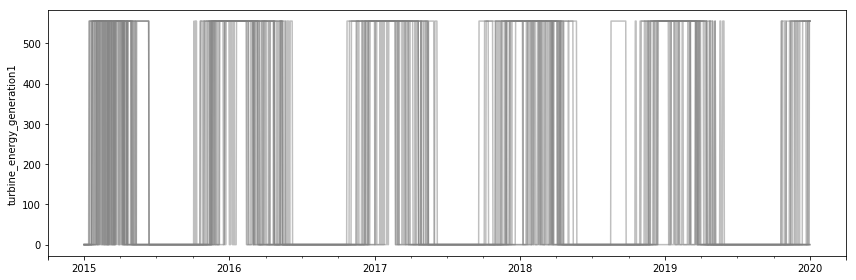

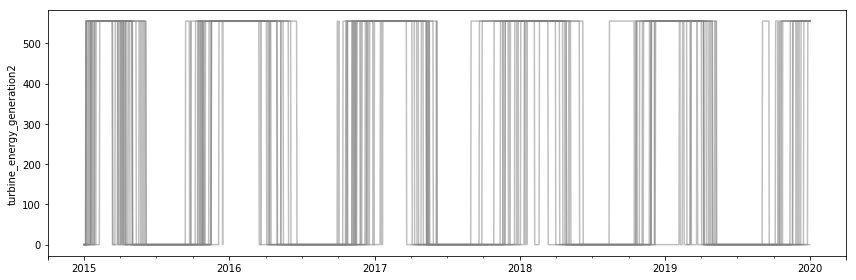

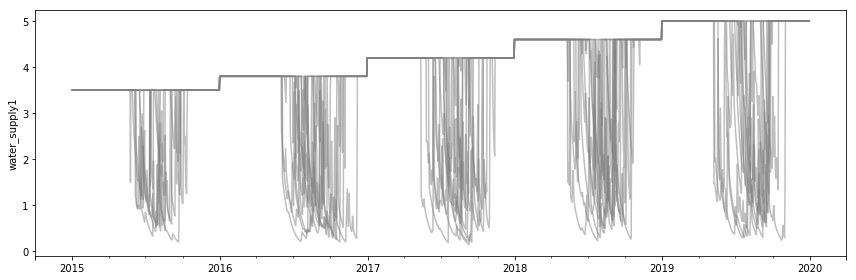

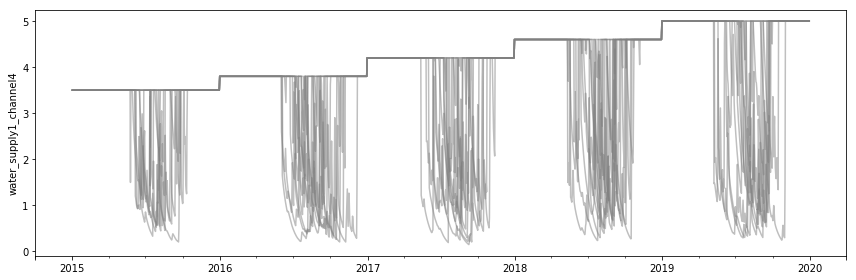

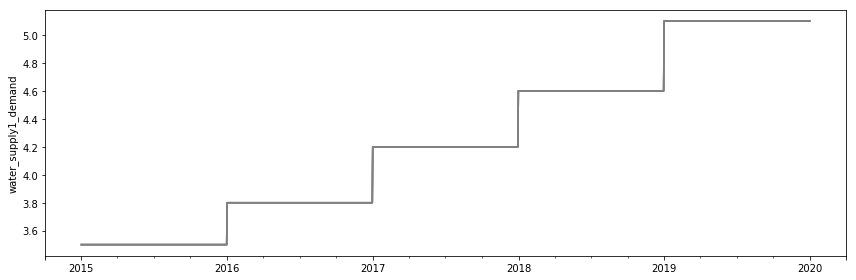

In [45]:
with tables.open_file(os.path.join(JSON_PATH,'water-energy_outputs.h5')) as h5:
#with tables.open_file('water-energy_dataframes.h5') as h5: 
#    print(h5)
    tbl = h5.get_node('/time')
    date_index = pandas.to_datetime({k: tbl.col(k) for k in ('year', 'month', 'day')})
    
    data = {}
    for ca in h5.walk_nodes('/', 'CArray'):
        data[ca._v_name] = pandas.DataFrame(ca.read(), index=date_index, columns=model.scenarios.multiindex)

    
#df = pandas.DataFrame(data, index=date_index)

df = pandas.concat(data, axis=1)
#print(df)
nrows = len(df.columns.levels[0])

#df.plot(subplots=True, )
FLOW_UNITS = 'Mm^3'
ENERGY_UNITS = 'MWh' 
PERCENTILES = np.linspace(0, 100)

Y_LABEL_MAP = {
#    'catchment1': f'Catchment 1 inflow [${FLOW_UNITS}/day$]',
#    'catchment2': f'Catchment 2 inflow [${FLOW_UNITS}/day$]',
#    'catchment3': f'Catchment 3 inflow [${FLOW_UNITS}/day$]',
#    'catchment4': f'Catchment 4 inflow [${FLOW_UNITS}/day$]',
#    'catchment5': f'Catchment 5 inflow [${FLOW_UNITS}/day$]',
#    'irrigation1': f'Irrigation Sector 1 [${FLOW_UNITS}/day$]',
#    'irrigation2': f'Irrigation Sector 2 [${FLOW_UNITS}/day$]',
#    'water_supply1': f'Water Supply [${FLOW_UNITS}/day$]',
#    'return_flow1': f'Return Flow [IS1] [${FLOW_UNITS}/day$]',
#    'return_flow2': f'Return Flow [IS2] [${FLOW_UNITS}/day$]',
#    'reservoir1': f'Reservoir storage 1 [${FLOW_UNITS}$]',
#    'reservoir2': f'Reservoir storage 2 [${FLOW_UNITS}$]',
#    'turbine1': f'Turbine flow 1 [${FLOW_UNITS}/day$]',
#    'turbine2': f'Turbine flow 2 [${FLOW_UNITS}/day$]',
 }


for node in df.columns.levels[0]:
    fig, ax = plt.subplots(nrows=1, figsize=(12, 4))
    df[node].plot(ax=ax, color='grey', alpha=0.5, legend=False)

    try:
        label = Y_LABEL_MAP[node]
    except KeyError:
        label = node
    
    ax.set_ylabel(label)
    plt.tight_layout()
    fig.savefig(os.path.join(FIG_PATH, f'{node}.png'), dpi=300)
#    fig.savefig(os.path.join(FIG_PATH, f'{node}.eps'))




In [22]:
with tables.open_file(os.path.join(DATA_PATH,'catchmod_flows_by_catchment_sub010.h5')) as Input:
#with tables.open_file(os.path.join(DATA_PATH,'flow.h5')) as Input:
    print(Input)

../data\catchmod_flows_by_catchment_sub010.h5 (File) ''
Last modif.: 'Tue Nov 20 16:09:56 2018'
Object Tree: 
/ (RootGroup) ''
/catchment1_cntr (Group) ''
/catchment1_cntr/axis0 (Array(10,)) ''
/catchment1_cntr/axis1 (Array(36524,)) ''
/catchment1_cntr/block0_items (Array(10,)) ''
/catchment1_cntr/block0_values (Array(36524, 10)) ''
/catchment1_scen (Group) ''
/catchment1_scen/axis0 (Array(10,)) ''
/catchment1_scen/axis1 (Array(36524,)) ''
/catchment1_scen/block0_items (Array(10,)) ''
/catchment1_scen/block0_values (Array(36524, 10)) ''
/catchment2_cntr (Group) ''
/catchment2_cntr/axis0 (Array(10,)) ''
/catchment2_cntr/axis1 (Array(36524,)) ''
/catchment2_cntr/block0_items (Array(10,)) ''
/catchment2_cntr/block0_values (Array(36524, 10)) ''
/catchment2_scen (Group) ''
/catchment2_scen/axis0 (Array(10,)) ''
/catchment2_scen/axis1 (Array(36524,)) ''
/catchment2_scen/block0_items (Array(10,)) ''
/catchment2_scen/block0_values (Array(36524, 10)) ''
/catchment3_cntr (Group) ''
/catchment3_c